In [2]:
import dataset
from datasets import load_dataset

ds = load_dataset("danavery/urbansound8k", split='train')


In [2]:
from dataset import UrbanSoundsDataset

ds = UrbanSoundsDataset(split = "train", test_fold = 10, train_folds = [1])

In [3]:
example = ds[1]['audio']['array']

In [16]:
#play audio
example_item = ds[1]
example_item['classID']

3

In [12]:
from torchaudio.transforms import MelSpectrogram, AmplitudeToDB

mel_transform = MelSpectrogram(n_fft=2048, hop_length=512, n_mels=128)


In [3]:
import torch
from dataset import create_spectrogram

example = ds[1]['audio']['array']
ex_spec = create_spectrogram(example, 16000)
print(ex_spec.shape)



torch.Size([1, 128, 126])


In [6]:
from CNN import ConvNet
from dataset import create_spectrogram

model = ConvNet()

example = ds[1]['audio']['array']
ex_spec = create_spectrogram(example, 16000)
ex_spec = ex_spec.unsqueeze(0)

model(ex_spec)

tensor([[-0.5720,  0.4543,  0.1827, -1.6191, -0.3982, -0.2014,  0.1861, -0.0607,
          0.3126,  0.5092]], grad_fn=<AddmmBackward0>)

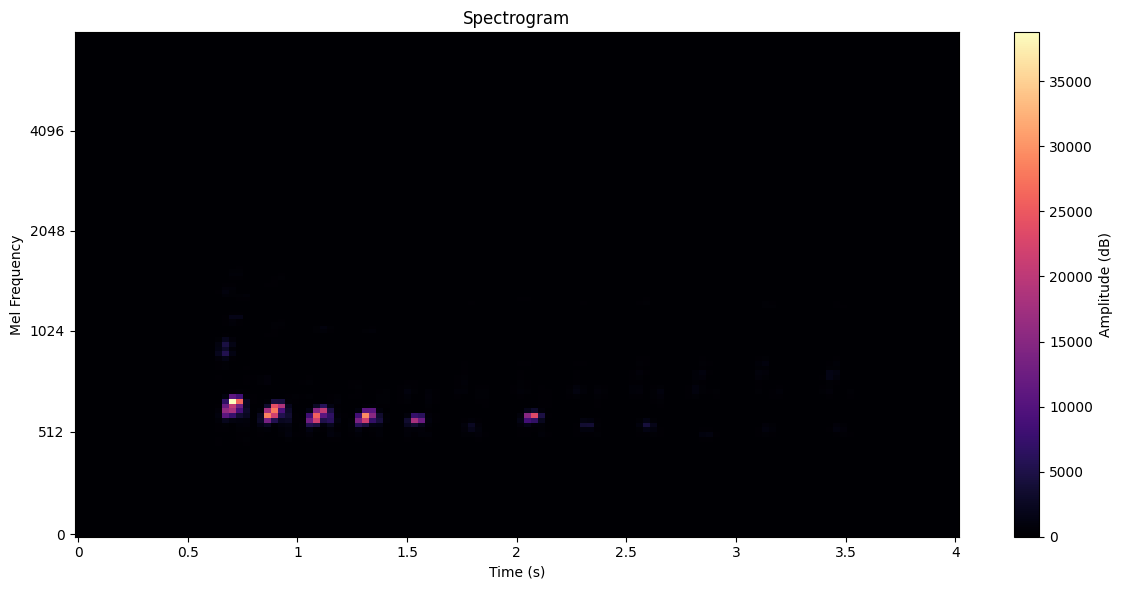

In [19]:
import matplotlib.pyplot as plt
from utils import plot_spectrogram_with_labels
from dataset import create_spectrogram


plot_spectrogram_with_labels(ex_spec, 16000)

In [ ]:
# Run a few training steps
from train import train_model
from dataset import UrbanSoundsDataset, urban_sounds_collate_fn
from CNN import ConvNet
from torch.utils.data import DataLoader

print("Loading Training data")
train_dataset = UrbanSoundsDataset(split="train")
print("Loading Validation data")
val_dataset = UrbanSoundsDataset(split="test")
print("Loading Model")
model = ConvNet()
print("Loading DataLoaders")
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, collate_fn=urban_sounds_collate_fn)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, collate_fn=urban_sounds_collate_fn)
print("Training model...")
train_model(model, train_loader, val_loader, epochs=10, lr=0.001, max_training_steps=100) #, log_interval=10)




Loading Training data


In [ ]:
import matplotlib.pyplot as plt



plt.plot(stepi, lossi)

In [ ]:
#Evaluate the model
from train import evaluate_model
from dataset import UrbanSoundsDataset, urban_sounds_collate_fn
from CNN import ConvNet
from torch.utils.data import DataLoader
import torch.nn as nn

criterion = nn.CrossEntropyLoss()

evaluate_model(model, val_loader, criterion)